# <span style=color:blue><b>SPRINT 5 - Tarea M5 T01</b></span>

## Ejercicio 1
<span style=color:green><b><i>Descarga el dataset adjunto de datos oficiales de la UEFA y selecciona un atributo del conjunto de datos. Calcula el p-valor y di si rechaza la hipótesis nula cogiendo un alfa de 5%.</i></b></span>

In [1]:
import pandas as pd

In [2]:
# Open the choosen file
BasePath = "C:/Users/Pepo/Desktop/Data Science/Barcelona Activa"
Archivo = BasePath + "/Sprint 5. Introducción al Test de Hipótesis y al Machine Learning"

uefa = pd.read_csv(Archivo + '/Tarea 1_UEFA/Lligues europees UEFA.csv', sep=';', encoding='ISO-8859-1')

In [3]:
uefa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rk               98 non-null     int64  
 1   Squad            98 non-null     object 
 2   Country          98 non-null     object 
 3   LgRk             98 non-null     int64  
 4   MP               98 non-null     int64  
 5   W                98 non-null     int64  
 6   D                98 non-null     int64  
 7   L                98 non-null     int64  
 8   GF               98 non-null     int64  
 9   GA               98 non-null     int64  
 10  GD               98 non-null     int64  
 11  Pts              98 non-null     int64  
 12  Pts/G            98 non-null     float64
 13  xG               98 non-null     float64
 14  xGA              98 non-null     float64
 15  xGD              98 non-null     float64
 16  xGD/90           98 non-null     float64
 17  Last 5           9

In [4]:
pd.options.display.max_columns = 0
uefa.head()

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
0,1,Manchester City,ENG,1,37,28,6,3,96,24,72,90,2.43,86.1,26.8,59.3,1.60,W W W W D,52739,Kevin De Bruyne - 15,Ederson
1,2,Liverpool,ENG,2,36,26,8,2,89,24,65,86,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Mohamed Salah - 22,Alisson
2,3,Real Madrid,ESP,1,37,26,7,4,80,31,49,85,2.30,73.0,45.8,27.2,0.73,W W L W D,40624,Karim Benzema - 27,Thibaut Courtois
3,4,Bayern Munich,GER,1,34,24,5,5,97,37,60,77,2.26,88.1,37.1,51.0,1.50,W W L D D,33176,Robert Lewandowski - 35,Manuel Neuer
4,5,Paris S-G,FRA,1,37,25,8,4,85,36,49,83,2.24,71.6,38.1,33.4,0.90,W D D D W,41188,Kylian Mbappé - 25,Keylor Navas


Al tratarse de un solo atributo, se propone analizar que distribución tienen los goles a favor (GF) marcados por los equipos.  
Se propone utilizar lo siguiente:  

**Shapiro-Wilk Test**  
*Tests whether a data sample has a Gaussian distribution.*
  
**Ho:** GF (Goals For) has a Gaussian distribution.  
**Ha:** GF (Goals For) does not have a Gaussian distribution.

In [14]:
# Shapiro-Wilk Normality Test
from scipy.stats import shapiro
stat, p = shapiro(uefa.GF)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.943, p=0.000
Probably not Gaussian


**R:** Se rechaza Ho ya que p = 0.000 < 5%, por la tanto GF **no tiene una distribución normal.**

In [15]:
import matplotlib.pyplot as plt

(array([ 1.,  3., 10.,  8., 13.,  8.,  8.,  8.,  6.,  7.,  7.,  5.,  2.,
         3.,  0.,  4.,  2.,  1.,  0.,  2.]),
 array([23. , 26.7, 30.4, 34.1, 37.8, 41.5, 45.2, 48.9, 52.6, 56.3, 60. ,
        63.7, 67.4, 71.1, 74.8, 78.5, 82.2, 85.9, 89.6, 93.3, 97. ]),
 <BarContainer object of 20 artists>)

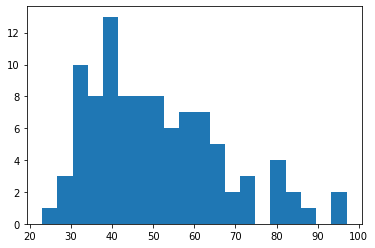

In [53]:
plt.hist(uefa.GF, 20)

## Ejercicio 2
<span style=color:green><b><i>Con el mismo dataset selecciona otros dos atributos del conjunto de datos. Calcula los p-valores y di si rechazan la hipótesis nula cogiendo un alfa de 5%.</i></b></span>

Al tratarse de 2 atributos, se propone analizar que correlación tienen: los goles diferencia (GD) vs. la expectativa de goles diferencia(xGD).  
Se utiliza lo siguiente:  
  
**Pearson’s Correlation Coefficient**  
*Tests whether two samples have a linear relationship.*  
  
**Ho:** the two samples are independent.  
**Ha:** there is a dependency between the samples.

In [54]:
# Pearson's Correlation test
from scipy.stats import pearsonr
data1 = uefa.GD
data2 = uefa.xGD
stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.935, p=0.000
Probably dependent


**R:** Se rechaza Ho ya que p = 0.000 < 5%, por la tanto GF y xG tienen una correlación lineal positiva (valor cercano a 1, stat=0.935)

(array([ 1.,  2.,  7.,  5.,  8.,  7., 14.,  8.,  7.,  7.,  8.,  7.,  7.,
         5.,  1.,  0.,  1.,  0.,  2.,  1.]),
 array([-40.4  , -35.415, -30.43 , -25.445, -20.46 , -15.475, -10.49 ,
         -5.505,  -0.52 ,   4.465,   9.45 ,  14.435,  19.42 ,  24.405,
         29.39 ,  34.375,  39.36 ,  44.345,  49.33 ,  54.315,  59.3  ]),
 <BarContainer object of 20 artists>)

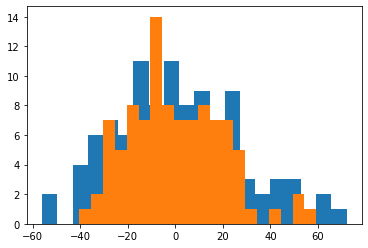

In [55]:
plt.hist(data1, 20)
plt.hist(data2, 20)

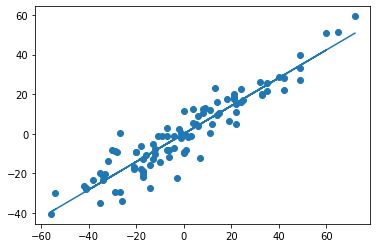

In [66]:
from scipy import stats

slope, intercept, r, p, std_err = stats.linregress(data1, data2)

def myfunc(data1):
  return slope * data1 + intercept

mymodel = list(map(myfunc, data1))

plt.scatter(data1, data2)
plt.plot(data1, mymodel)

In [72]:
from scipy import stats

slope, intercept, r, p, std_err = stats.linregress(data1, data2)

print(round(r,3))

0.935


## Ejercicio 3
<span style=color:green><b><i>Continúa con el conjunto de datos adjunto y selecciona tres atributos del conjunto de datos. Calcula el p-valor y di si rechaza la hipótesis nula cogiendo un alfa de 5%.</i></b></span>

Al tratarse de 3 atributos, se propone analizar que distribución tienen: gol diferencia (GD), expectativa de gol diferencia (xGD) y los puntos (Pts).  
Se utiliza lo siguiente:  
  
**Friedman Test**  
*Tests whether the distributions of two or more paired samples are equal or not.*  
  
**Ho:** the distributions of all samples are equal.  
**Ha:** the distributions of one or more samples are not equal.

In [56]:
# Friedman Test
from scipy.stats import friedmanchisquare
data1 = uefa.GD
data2 = uefa.xGD
data3 = uefa.Pts
stat, p = friedmanchisquare(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=147.790, p=0.000
Probably different distributions


**R:** Se rechaza Ho ya que p = 0.000 < 5%, por la tanto las distribuciones entre las 3 muestras no son iguales.

(array([ 1.,  2.,  4.,  6.,  6., 12.,  9., 10.,  6.,  3.,  7.,  7.,  6.,
         7.,  3.,  1.,  2.,  1.,  4.,  1.]),
 array([18. , 21.6, 25.2, 28.8, 32.4, 36. , 39.6, 43.2, 46.8, 50.4, 54. ,
        57.6, 61.2, 64.8, 68.4, 72. , 75.6, 79.2, 82.8, 86.4, 90. ]),
 <BarContainer object of 20 artists>)

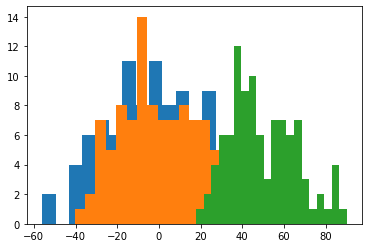

In [61]:
plt.hist(data1, 20)
plt.hist(data2, 20)
plt.hist(data3, 20)